Part 1: 01_Measuring_Differences_Means

In [1]:
library( tidyverse )

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library( broom )

In [3]:
options(repr.plot.width=4, repr.plot.height=3)

# Intercepts

In [4]:
uniform_noise <- function() { 
    runif( n=100, min=-1, max=1 )
}

## Helper function 1: Uniform Noise

* Gives 100 values between -1 and 1 spread evenly.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


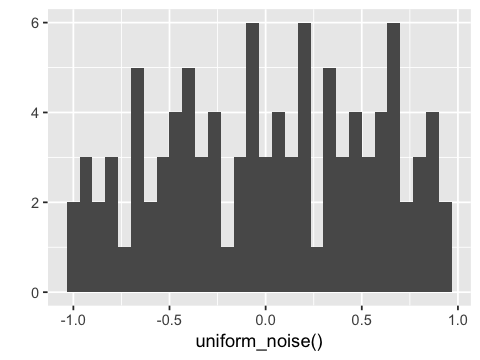

In [5]:
qplot( uniform_noise() )

## Helper funciton 2: Gaussian Noise

* Gives 100 values on a bell curve with mean=0 and standard deviation = 1

In [6]:
gaussian_noise <- function() {
    rnorm( n=100 ) 
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


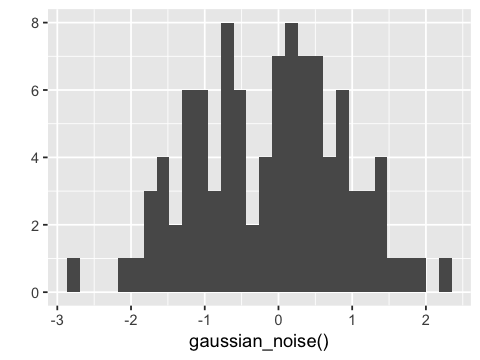

In [7]:
qplot( gaussian_noise() )

### E.g. Target practice

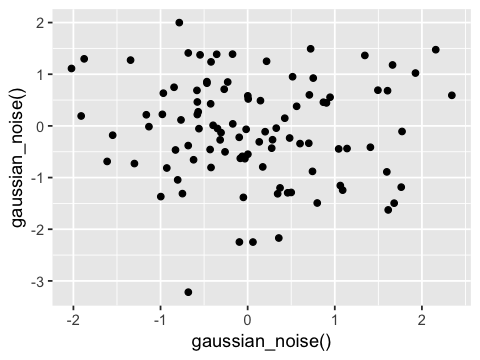

In [8]:
qplot( x=gaussian_noise(), y=gaussian_noise() )

# Descriptive statistics

* The mean: a very simple statistical model:
* $Y = \beta_0 + \epsilon$ (no mx here)

In [9]:
y <- 7 + gaussian_noise()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


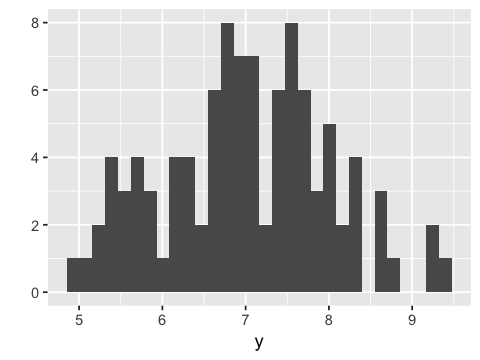

In [10]:
qplot( y )

In [11]:
mean( y )

[1] 7.01673

In [12]:
library( skimr )


Attaching package: ‘skimr’

The following object is masked from ‘package:stats’:

    filter



In [13]:
skim_to_wide( y )

type,variable,missing,complete,n,mean,sd,p0,p25,p50,p75,p100,hist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
numeric,x,0,100,100,7.02,1,4.95,6.32,7.02,7.64,9.42,▃▃▅▇▇▃▂▁


## The lm() function in R wears many hats

In [14]:
model0 <- lm( y ~ 1 )

In [15]:
summary( model0 )


Call:
lm(formula = y ~ 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06591 -0.69209 -0.00125  0.62155  2.40156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.01673    0.09986   70.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9986 on 99 degrees of freedom


In [16]:
glance( model0 )

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,0,0.9986491,NA,NA,1,-141.2562,286.5123,291.7226,98.73269,99


In [17]:
tidy( model0 )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.01673,0.09986491,70.26222,2.747195e-86


## Compart output of lm function to t-test

In [18]:
t.test( y )


	One Sample t-test

data:  y
t = 70.262, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.818577 7.214884
sample estimates:
mean of x 
  7.01673 


In [19]:
glance( t.test( y ) )

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7.01673,70.26222,2.747195e-86,99,6.818577,7.214884,One Sample t-test,two.sided


In [20]:
model2 <- lm( y ~ x - 1, blob )

ERROR: Error in is.data.frame(data): object 'blob' not found


In [21]:
summary( model2 )

ERROR: Error in summary(model2): object 'model2' not found


In [22]:
anova( model1, model2 )

ERROR: Error in anova(model1, model2): object 'model1' not found


# Step response using lm() and aov()

* Let's generate some fake data
* There are two classes here, can think of them as treatment and control

In [23]:
fake_data_A <- data.frame( X1=uniform_noise(), Y=gaussian_noise(), Class=rep(0,100) )
fake_data_B <- data.frame( X1=uniform_noise(), Y=gaussian_noise()+1, Class=rep(1,100) )
fake_data_all <- rbind( fake_data_A, fake_data_B )
fake_data_all$Class <- as.factor( fake_data_all$Class )

In [24]:
skim_to_wide( fake_data_all )

type,variable,missing,complete,n,n_unique,top_counts,ordered,mean,sd,p0,p25,p50,p75,p100,hist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
factor,Class,0,200,200,2,"0: 100, 1: 100, NA: 0",FALSE,NA,NA,NA,NA,NA,NA,NA,NA
numeric,X1,0,200,200,NA,NA,NA,0.026,0.58,-1,-0.47,0.046,0.56,1,▆▆▅▇▇▅▇▇
numeric,Y,0,200,200,NA,NA,NA,0.43,1.05,-1.73,-0.39,0.45,1.16,3.59,▃▃▆▇▆▃▁▁


In [25]:
sample_n( fake_data_all, 5)

X1,Y,Class
<dbl>,<dbl>,<fct>
-0.2840288,-1.3214585,1
0.9608457,1.5019410,1
-0.8502784,-0.8891987,0
0.4932882,-1.0839165,1
-0.6976124,0.1432540,0


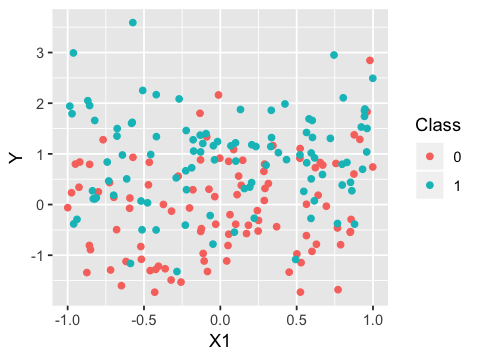

In [26]:
ggplot( fake_data_all, aes( x=X1, y=Y, color=Class) ) + geom_point()

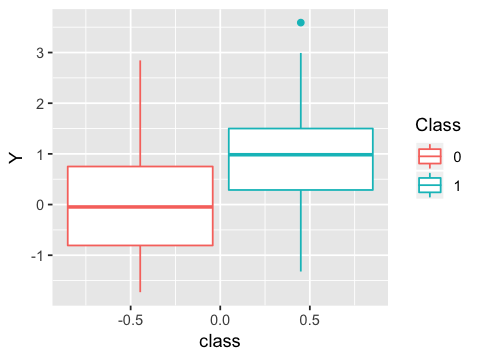

In [27]:
ggplot( fake_data_all, aes( x=X1, y=Y, color=Class ) ) + 
    geom_boxplot() +
    labs( x='class' )

## Adding a non-predictive predictor variable to model

* The Null model is "Y ~ 1" ... a test for the intercept.

In [28]:
model0 <- lm( Y ~ 1, fake_data_all )

In [29]:
summary( model0 )


Call:
lm(formula = Y ~ 1, data = fake_data_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16189 -0.81951  0.01935  0.72664  3.15775 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4327     0.0742   5.831  2.2e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.049 on 199 degrees of freedom


In [30]:
model1 <- lm( Y ~ X1, fake_data_all )

In [31]:
summary( model1 )


Call:
lm(formula = Y ~ X1, data = fake_data_all)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2585 -0.8199  0.0431  0.6768  3.2749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.42766    0.07403   5.777 2.91e-08 ***
X1           0.19568    0.12760   1.534    0.127    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.046 on 198 degrees of freedom
Multiple R-squared:  0.01174,	Adjusted R-squared:  0.006748 
F-statistic: 2.352 on 1 and 198 DF,  p-value: 0.1267


## Add in an informative predictor variable to model

* Here the output variable Y is just the Class identity with some noise, so the variable Class is as informative a predictor as you're going to get

In [32]:
model2 <- lm( Y ~ Class, fake_data_all )

In [33]:
summary( model2 )


Call:
lm(formula = Y ~ Class, data = fake_data_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.23175 -0.66937  0.04916  0.69460  2.88989 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04492    0.09362  -0.480    0.632    
Class1       0.95521    0.13239   7.215 1.12e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9362 on 198 degrees of freedom
Multiple R-squared:  0.2082,	Adjusted R-squared:  0.2042 
F-statistic: 52.05 on 1 and 198 DF,  p-value: 1.123e-11


## Compare lm() output with t-test output

* The confidence interval for each of the betas quantifies the error for the estimate of beta, not for the ground truth value of beta. Normally you wont know the expected. You're quantifying the degree to which the regression coefficient is different from zero.

In [34]:
confint( model2 ) 

,2.5 %,97.5 %
(Intercept),-0.2295333,0.1396942
Class1,0.6941260,1.2162926


In [35]:
t.test( Y ~ Class, fake_data_all )


	Welch Two Sample t-test

data:  Y by Class
t = -7.2149, df = 197.75, p-value = 1.127e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2162946 -0.6941239
sample estimates:
mean in group 0 mean in group 1 
    -0.04491955      0.91028973 


# Comparing models using the deviance (anova) table

* In R, the deviance table is generated using the anova() function

In [36]:
anova( model0, model1, model2 )

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
199,219.1501,NA,NA,NA,NA
198,216.5775,1,2.57266,2.351984,0.12672
198,173.5289,0,43.04858,NA,NA


# Add a "weak" predictor variable X2 for outcome variable Y

In [37]:
fake_data_all <- fake_data_all %>%
    mutate( X2 = as.numeric( Class ) + rnorm( n=200 ) )

In [38]:
fake_data_all %>% sample_n( 5 )

X1,Y,Class,X2
<dbl>,<dbl>,<fct>,<dbl>
0.6943467,-0.0328858,0,-0.06715464
-0.6175377,-1.1233190,0,1.21337614
-0.9744521,0.2328312,0,3.61412451
0.6407990,0.1843036,0,-0.48372036
0.1927531,0.3443875,1,3.56415403


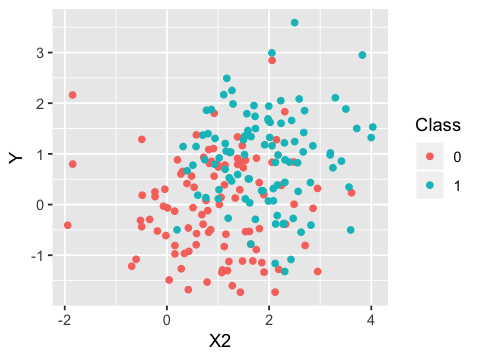

In [39]:
fake_data_all %>% 
    ggplot( aes( x=X2, y=Y, color=Class ) ) +
    geom_point()

## Refit the Null model 

In [40]:
model0 <- lm( Y ~ 1, fake_data_all )

In [41]:
summary( model0 )


Call:
lm(formula = Y ~ 1, data = fake_data_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16189 -0.81951  0.01935  0.72664  3.15775 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4327     0.0742   5.831  2.2e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.049 on 199 degrees of freedom


### How would you interpret the results of this model?

In [42]:
model1 <- lm( Y ~ X2, fake_data_all )

In [43]:
summary( model1 )


Call:
lm(formula = Y ~ X2, data = fake_data_all)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3100 -0.7381  0.1026  0.6662  2.9241 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.11340    0.12199   0.930  0.35375   
X2           0.22121    0.06799   3.254  0.00134 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.025 on 198 degrees of freedom
Multiple R-squared:  0.05075,	Adjusted R-squared:  0.04596 
F-statistic: 10.59 on 1 and 198 DF,  p-value: 0.001339


In [44]:
model2 <- lm( Y ~ X1 + X2, fake_data_all )

In [45]:
summary( model2 )


Call:
lm(formula = Y ~ X1 + X2, data = fake_data_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.39665 -0.71473  0.08804  0.63468  3.03567 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.11460    0.12167   0.942   0.3474   
X1           0.17920    0.12483   1.436   0.1527   
X2           0.21719    0.06786   3.200   0.0016 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.022 on 197 degrees of freedom
Multiple R-squared:  0.06058,	Adjusted R-squared:  0.05104 
F-statistic: 6.352 on 2 and 197 DF,  p-value: 0.002121


In [46]:
anova( model0, model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
199,219.1501,NA,NA,NA,NA
198,208.0273,1,11.122801,10.643388,0.001302017
197,205.8735,1,2.153797,2.060964,0.152700389


# Multiple regression - more than one predictor variable

* Add another predictor variable - the class identity plus noise

In [47]:
fake_data_all <- fake_data_all %>%
    mutate( X3 = as.numeric( Class ) + rnorm( n=200 ) ) %>%
    select( Class, Y, X1, X2, X3 ) # reorder 

In [48]:
options(repr.plot.width=4, repr.plot.height=3)

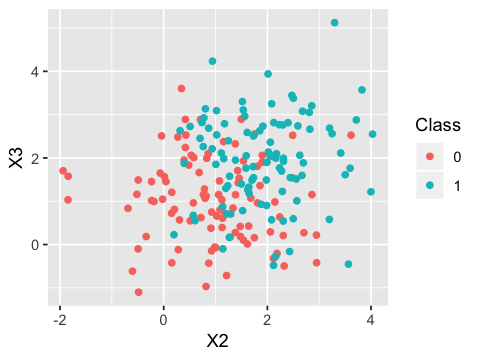

In [49]:
fake_data_all %>% 
    ggplot( aes( x=X2, y=X3, color=Class ) ) +
    geom_point()

# Exploratory data analysis: using a scatterpot

In [50]:
library( GGally )

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [51]:
options(repr.plot.width=5, repr.plot.height=5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


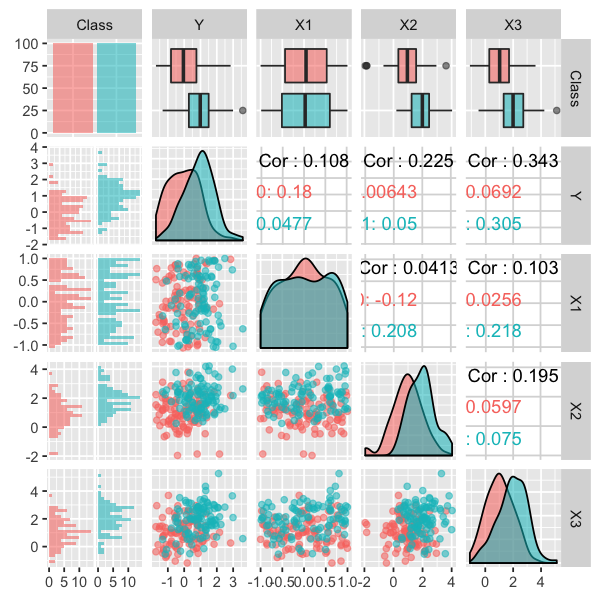

In [52]:
ggpairs( fake_data_all, aes( color=Class, alpha=0.1) )

In [53]:
model0 <- lm( Y ~ 1, fake_data_all )

In [54]:
model1 <- lm( Y ~ X2, fake_data_all )

In [55]:
model3 <- lm( Y ~ X2 + X3, fake_data_all )

In [56]:
summary( model3 )


Call:
lm(formula = Y ~ X2 + X3, data = fake_data_all)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3558 -0.6427  0.0159  0.6735  3.2543 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.24336    0.13950  -1.745   0.0826 .  
X2           0.16160    0.06602   2.448   0.0152 *  
X3           0.29480    0.06381   4.620 6.93e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9761 on 197 degrees of freedom
Multiple R-squared:  0.1435,	Adjusted R-squared:  0.1348 
F-statistic: 16.51 on 2 and 197 DF,  p-value: 2.355e-07
